## Primeiramente importamos as bibliotecas utilizadas

In [1]:
import pandas as pd

## O próximo passo é ler a base <i>insurance.csv</i> para a variável <i>dataset</i>


In [2]:
dataset = pd.read_csv("insurance.csv")

## Após a divisão, vamos imprimir os 10 primeiros valores da base, para termos ideia dos dados

In [3]:
# Qual o código para imprimir as 10 primeiras linhas do dataset? Complete o código abaixo
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Análise exploratória de características
O acesso aos atributos pertencentes a base de dados, que esta contida na variável <i>dataset</i>, se da com um ponto final, seguido do nome do atributo a ser acessado. Após o nome do atributo, pode-se chamar algumas funções, como por exemplo, a função <i>.describe()</i>, que fornece algumas estatísticas sobre o atributo.
Além da função <i>.describe()</i>, existem outros exemplos úteis:


<li><i>.sum()</i> fornece a soma </li>
<li><i>.mean()</i> fornece a média </li>
<li><i>.count()</i> fornece o contador de ocorrências distintas </li>
<li><i>.min()</i> fornece o mínimo </li>
<li><i>.max()</i> fornece o máximo </li>
<li><i>.median()</i> fornece a mediana </li>
<li><i>.std()</i> fornece o desvio padrão </li>
<li><i>.skew()</i> fornece o skewness *</li>
<li><i>.kurt()</i> fornece a curtose **</li>
<li><i>.corr()</i> fornece a matriz de correlação</li>
<li><i>.cov()</i> fornece a matriz de covariância</li>

<b>*Skewness é uma medida da assimetria da distribuição de probabilidade de uma variável aleatória de valor real sobre sua média </b>

<b>**Propriedade de uma distribuição de frequências que caracteriza seu achatamento em relação à curva de distribuição de Gauss</b>


In [4]:
dataset.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

## Uma Rápida analise

Text(0.5, 1.0, 'Distribuição por idade e sexo')

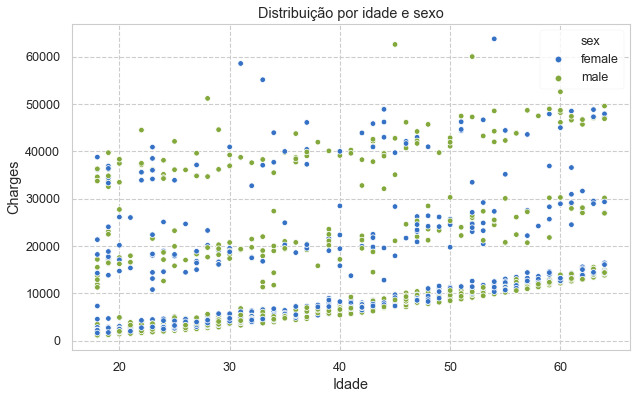

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "age", y = "charges", data = dataset, hue = "sex")
plt.xlabel("Idade")
plt.ylabel("Charges")
plt.title("Distribuição por idade e sexo")

In [18]:
dataset.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [ ]:
dataset['issmoker'] = dataset.smoker.apply(lambda x: 1 if x=='yes' else 0)

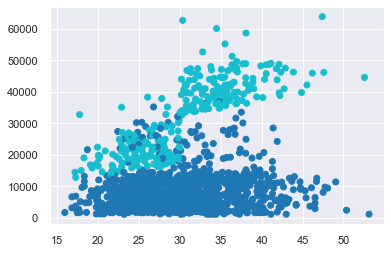

In [37]:
#dataset.groupby('smoker')[['bmi','charges']]
import numpy as np
sns.set()
plt.scatter(y=dataset.charges,x=dataset.bmi, c=dataset.issmoker,cmap='tab10')
plt.show()

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not smoker.

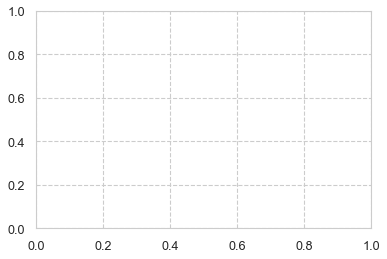

In [8]:
dataset.plot.scatter('bmi','charges', c='smoker')

## A maioria dos algoritmos de ML trabalha apenas com dados numéricos
Tendo isto em mente, devemos transformar todos os atributos que estão em formato texto em números. Estes atributos são: <i><b>sex, smoker e region</b></i>. Vamos inicialmente importar a bilioteca <i>LabelEncoder</i>, e após criar três novas variáveis: <i><b>le_sex, le_smoker e le_region</b></i>. Cada uma destas variáveis será utilizada para <i>"encodar"</i> os valores em texto para valores numéricos para cada uma das variáveis. Após, são acessados os atributos em questão na base de dados que encontra-se associada a variável <i>dataset</i> e é aplicada a função <i> .fit_transform()</i> em cada um, transformando os valores em numéricos.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()

# Complete os codigos faltantes a seguir para realizar o encode das features smoker e region
le_smoker = LabelEncoder()
le_region = LabelEncoder()

dataset.sex = le_sex.fit_transform(dataset.sex)
dataset.smoker = le_smoker.fit_transform(dataset.smoker)
dataset.region = le_region.fit_transform(dataset.region)

## Vamos agora imprimir as 10 primeiras linhas novamente, para ver se tudo esta ok

In [ ]:
dataset.head(10)

## Aparentemente esta quase tudo ok, porém, como vamos prever um atributo contínuo, utilizaremos a tarefa de regressão, e tal tarefa é beneficiada de dados normalizados
Inicialmente importamos a biblioteca <i>preprocessing</i> e atribuimos a variável <i>min_max_scaler</i> o método <i>.MinMaxScaler()</i> da biblioteca <i>preprocessing</i>. Este método é responsável por normalizar a base de dados. A linha sequente aplica o método a nosso <i>dataset</i>, e por fim, substituimos o <i>dataset</i> pelo novo, agora normalizado.

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dataset)
dataset = pd.DataFrame(np_scaled, columns=dataset.columns)

## Agora vamos imprimir novamente as 10 primeiras linhas para ver se esta tudo ok